In [1]:
%matplotlib inline
%config Completer.use_jedi = False # to use autocomplete
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
import json
import pandas as pd
import sklearn
from random import seed
from sklearn.model_selection import KFold
from sklearn import linear_model, ensemble, neighbors, tree
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from texttable import Texttable
import scipy.optimize as optimization
RANDOM_SEED=0
seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
print(sklearn.__version__)
from itertools import combinations
from numpy.random import default_rng
import itertools
plt.rcdefaults()
# plt.rcParams.update({'font.family':'fantasy'})

0.24.2


In [2]:
def path_leaf(path): # get filename(with extension) from path
    head, tail = os.path.split(path)
    return tail or os.path.basename(head)


def file_in_folder(folder_path, flag=1): # get files in given folder, return list of filepath and filename
    file_list = []
    file_name = []
    for(dirpath, dirnames, filenames) in os.walk(folder_path):
#         print(filenames)
        
        for i in filenames:
            try:
                file_list += [dirpath + os.sep + i]
                file_name += [i]
            except:
                continue
        if flag == 0:
            break
        file_list.sort(key=path_leaf)
        file_name.sort()
    return [file_list, file_name]

In [3]:
res_dir = '../../prediction_code/pooled_transfer/in_sample'
all_folders = [os.path.join(res_dir, i) for i in os.listdir(res_dir)]

data_folder = '../../../data/PPP_normalized_pooled_data'
file_list, file_name = file_in_folder(data_folder)
file_list = [i for i in file_list if '.csv' in i]
file_name = [i for i in file_name if '.csv' in i]
num_name_dic = {i: name for i, name in enumerate(file_name)}
name_num_dic = {name: i for i, name in enumerate(file_name)}
# print(num_name_dic, name_num_dic)

all_params = ['a', 'b', 'd', 'g']
CPT_models = []
for i in range(1, len(all_params)+1):
    tmp = list(itertools.combinations(all_params, i))
    CPT_models += tmp
    
CPT_models = [''.join(i) for i in CPT_models]
CPT_models = ['g', 'ab', 'dg', 'abg', 'abdg']
# model_types = [model_types[-1]]
print(CPT_models)
ML_models = ['DT', 'RF', 'NN']
ML_models = ['Lasso', 'RF', 'NN']
# ML_models = ['EU_iso', 'RF', 'NN', 'kernel_ridge_rbf']
ML_models = ['EU_iso', 'RF', 'kernel_ridge_rbf']
all_models = CPT_models + ML_models




['g', 'ab', 'dg', 'abg', 'abdg']


In [4]:
show_num_name_dic = {'num': [], 'name': []}
for key, val in num_name_dic.items():
    show_num_name_dic['num'].append(key)
    show_num_name_dic['name'].append(val)
num_name_df = pd.DataFrame.from_dict(show_num_name_dic)
print(num_name_df.to_latex(index=False))
num_name_df


\begin{tabular}{rl}
\toprule
 num &                                               name \\
\midrule
   0 &                                    30countries.csv \\
   1 &         Monetary incentives in the loss domain.csv \\
   2 & accommodating stake effects under prospect theo... \\
   3 &                                      ch03\_ch06.csv \\
   4 &              decisions with compound lotteries.csv \\
   5 &                             ellsberg revisited.csv \\
   6 & experiments on compound risk in relation t o si... \\
   7 & how do risk attitudes affect measured confidenc... \\
   8 &                     impatience and uncertainty.csv \\
   9 & incentive effects on rist attitude in small pro... \\
  10 & on the empirical validity of cumulative prospec... \\
  11 & on the interaction of risk and time preferences... \\
  12 &                        rationality on the rise.csv \\
  13 & the empirical relationship between nonstandard ... \\
\bottomrule
\end{tabular}



,num,name
0,0,30countries.csv
1,1,Monetary incentives in the loss domain.csv
2,2,accommodating stake effects under prospect the...
3,3,ch03_ch06.csv
4,4,decisions with compound lotteries.csv
5,5,ellsberg revisited.csv
6,6,experiments on compound risk in relation t o s...
7,7,how do risk attitudes affect measured confiden...
8,8,impatience and uncertainty.csv
9,9,incentive effects on rist attitude in small pr...


In [5]:
def get_in_sample(folder='../../prediction_code/pooled_transfer/in_sample'):
    in_sample_folders = os.listdir(folder)
    res = {}
    for cur_fol in in_sample_folders:
        file_list, file_name = file_in_folder(os.path.join(folder, cur_fol))
        file_list = [i for i in file_list if '.json' in i]
        file_name = [i for i in file_name if '.json' in i]
#         print(file_list)
        for file in file_list:
            with open(file, 'r') as f:
                content = json.load(f)
#             print(content)
            if cur_fol not in res.keys():
                res[cur_fol] = {}
#             print(file)
#             if '/EU' in file:
#                 tmp = 'EU'
#             else:
            tmp = content['model_type']
            res[cur_fol][tmp] = content['train_mse']
    print(res)
    return res

In [6]:
in_sample_res = get_in_sample()

{'9': {'EU_expo': 19.587413411154053, 'EU_iso': 19.138569863466014, 'RF': 19.13750546593209, 'a': 19.511872540336824, 'ab': 19.511872540336824, 'abd': 19.511872540336824, 'abdg': 19.511872540336824, 'abg': 19.511872540336824, 'ad': 19.511872540336824, 'adg': 19.511872540336824, 'ag': 19.511872540336824, 'b': 19.587413411154053, 'bd': 19.511872540336824, 'bdg': 19.511872540336824, 'bg': 19.587413411154053, 'd': 19.511872540336824, 'dg': 19.511872540336824, 'g': 19.587413411154053, 'kernel_ridge_rbf': 19.189788721601637}, '0': {'EU_expo': 17.4347057788791, 'EU_iso': 17.061707490441343, 'RF': 15.666653251874232, 'a': 17.411957344094475, 'ab': 17.41195734409448, 'abd': 17.30021956309699, 'abdg': 15.933550397707643, 'abg': 15.968050444438894, 'ad': 17.300219563096984, 'adg': 15.933550397707643, 'ag': 15.98642704703998, 'b': 17.4347057788791, 'bd': 17.300219563096988, 'bdg': 15.93355039770768, 'bg': 16.025889386339685, 'd': 17.300219563096984, 'dg': 15.933550397707638, 'g': 16.04396212515941

In [7]:
def get_round(a, digit=3):
    return round(a, digit)

def get_res(folder, normalize=False, in_sample_dic=None):
    file_list, file_name = file_in_folder(folder)
    file_list = [i for i in file_list if '.json' in i]
    file_name = [i for i in file_name if '.json' in i]
    print(file_list)
    res_dic = {'model': [], 'train_data': [], 'train_mse': []}
    train_data = folder.split('/')[1]
    for model_type in all_models:
        for file in file_list:
            file_type = path_leaf(file).split('.json')[0]
            if model_type == file_type:
                with open(file, 'r') as f:
                    content = json.load(f)
#                 print(content)
                res_dic['model'].append(content['model_type'])
                res_dic['train_data'].append(train_data)
                res_dic['train_mse'].append(get_round(content['train_mse']))
                for key, val in content['test_mse'].items():
                    if key not in res_dic.keys():
                        res_dic[key] = []
                    if normalize:
                        res_dic[key].append(get_round(val/in_sample_dic[key][model_type]))
                    else:
                        res_dic[key].append(get_round(val))

#     print(res_dic)
    df = pd.DataFrame.from_dict(res_dic)
    display(df)
    print(df.to_latex(index=False))
    return res_dic

In [8]:
print(len(in_sample_res.keys()))
in_sample_res['12']

14


{'EU_expo': 6543.569133761682,
 'EU_iso': 6543.5694902713785,
 'RF': 648.1401518042304,
 'a': 6543.516488404847,
 'ab': 6543.516488404877,
 'abd': 4077.3440629207466,
 'abdg': 1818.963681386604,
 'abg': 1882.3241818258628,
 'ad': 4077.343547209623,
 'adg': 1818.9399236135114,
 'ag': 1882.3241818258628,
 'b': 6543.569133761682,
 'bd': 4699.698057532376,
 'bdg': 2334.947820433458,
 'bg': 2345.0858409324233,
 'd': 4699.698057532363,
 'dg': 2334.9478204334587,
 'g': 2345.0858409324233,
 'kernel_ridge_rbf': 656.1998102801255}

In [9]:
def get_index(arr, median_of):
    # median_of is 'min', 'max', or percentile (50, 75, 90, etc.)
    if median_of == 'max':
        return np.argmax(arr)
    elif median_of == 'min':
        return np.argmin(arr)
    else:
        percent = int(median_of)
        interpolation = 'higher'
        if percent < 50:
            interpolation = 'lower'
        val = np.percentile(arr, percent, interpolation=interpolation)
#         if val in arr:
#             print(1, val)
#         else:
#             print(0, val)
#             print(arr)
        if type(arr) == np.ndarray:
            return np.where(arr == val)[0][0]
        else:
            return arr.index(val)

def get_percentile(arr, median_of):
    # median_of is 'min', 'max', or percentile (50, 75, 90, etc.)
    if median_of == 'max':
        return np.max(arr)
    elif median_of == 'min':
        return np.min(arr)
    else:
        percent = int(median_of)
        interpolation = 'higher'
        if percent < 50:
            interpolation = 'lower'
        val = np.percentile(arr, percent, interpolation=interpolation)
        return val

def get_median_transfer_error(folder_list, all_contents=None, normalize=False, in_sample_dic=None, use_best_in_sample=False, median_of='max', median_of_list=None, model_to_see=None):
    print(model_to_see)
    if use_best_in_sample:
        best_in_sample_across_model = {}
        for key, val in in_sample_dic.items():
            best_in_sample_across_model[key] = {}

            best_in_sample = 1e10
            for model_type, cur_error in val.items():
                if model_type not in model_to_see:
                    continue
                if best_in_sample > cur_error:
                    best_in_sample = cur_error
            for model_type in val.keys():
                if model_type not in model_to_see:
                    continue
                best_in_sample_across_model[key][model_type] = best_in_sample
    else:
        best_in_sample_across_model = in_sample_dic
    
        
#     print(best_in_sample_across_model)
#     res_dic = {'model': [], 'train_data': [], 'train_mse': []}
    res_dic = {}
    all_res_dic = {}
    for folder in folder_list:
        file_list, file_name = file_in_folder(folder)
        file_list = [i for i in file_list if '.json' in i]
        file_name = [i for i in file_name if '.json' in i]
#         print(file_list)
        
        train_data = folder.split('/')[-1]
#         print(folder)
        for model_type in model_to_see:
            if model_type not in res_dic.keys():
                res_dic[model_type] = {'train_data': [], 'transfer_domain': [], 'in_sample': [], 
                                       'raw_transfer': [], 'best_in_sample': [], 'transfer_ratio': []}
                all_res_dic[model_type] = {'train_data': [], 'transfer_domain': [], 'in_sample': [], 
                                       'raw_transfer': [], 'best_in_sample': [], 'transfer_ratio': []}
            for file in file_list:
                file_type = path_leaf(file).split('.json')[0]
                if model_type == file_type:
                    if all_contents is not None:
                        content = all_contents[file]
                    else:
                        with open(file, 'r') as f:
                            content = json.load(f)

                    all_transfer_domain = []
                    all_transfer_error_ratio = []
                    raw_transfer = []
                    in_sample = []
                    best_in_sample = []
                    for key, val in content['test_mse'].items():
                        all_transfer_domain.append(key)
                        raw_transfer.append(get_round(np.sqrt(val)))
                        in_sample.append(get_round(np.sqrt(in_sample_dic[key][model_type])))
                        best_in_sample.append(get_round(np.sqrt(best_in_sample_across_model[key][model_type])))
#                         all_transfer_error_ratio.append(get_round(best_in_sample_across_model[key][model_type]/val))
                        all_transfer_error_ratio.append(get_round(np.sqrt(val)/np.sqrt(best_in_sample_across_model[key][model_type])))
#                         if normalize:
#                             all_transfer_error_ratio.append(get_round(best_in_sample_across_model[key][model_type]/val))
#                         else:
#                             all_transfer_error_ratio.append(get_round(val))
                    
#                     print(len(all_transfer_domain))
                    if normalize:
                        list_to_find_index = all_transfer_error_ratio
                    else:
                        list_to_find_index = raw_transfer
#                     best_idx = np.argmax(raw_transfer)
                    best_idx = get_index(list_to_find_index, median_of=median_of)
#                     print(best_idx)
                    res_dic[model_type]['train_data'].append(train_data)
                    res_dic[model_type]['transfer_ratio'].append(all_transfer_error_ratio[best_idx])
                    res_dic[model_type]['transfer_domain'].append(all_transfer_domain[best_idx])
                    res_dic[model_type]['raw_transfer'].append(raw_transfer[best_idx])
                    res_dic[model_type]['in_sample'].append(in_sample[best_idx])
                    res_dic[model_type]['best_in_sample'].append(best_in_sample[best_idx])
                    
                    all_res_dic[model_type]['train_data'].append([train_data]*len(all_transfer_error_ratio))
                    all_res_dic[model_type]['transfer_ratio'].append(all_transfer_error_ratio)
                    all_res_dic[model_type]['transfer_domain'].append(all_transfer_domain)
                    all_res_dic[model_type]['raw_transfer'].append(raw_transfer)
                    all_res_dic[model_type]['in_sample'].append(in_sample)
                    all_res_dic[model_type]['best_in_sample'].append(best_in_sample)
    

    final_return = {}
    for median_of in median_of_list:
        print(median_of)
        res_dic = {}
        for model_type in model_to_see:
            if model_type not in res_dic.keys():
                res_dic[model_type] = {'train_data': [], 'transfer_domain': [], 'in_sample': [], 
                                       'raw_transfer': [], 'best_in_sample': [], 'transfer_ratio': []}
            
#             for i in range(len(all_res_dic[model_type]['train_data'])):
#             print(model_type)
#             print(all_res_dic[model_type]['train_data'])
            train_data = all_res_dic[model_type]['train_data'][0][0]
            all_transfer_domain = np.array(all_res_dic[model_type]['transfer_domain']).reshape(-1,)
            all_transfer_error_ratio = np.array(all_res_dic[model_type]['transfer_ratio']).reshape(-1,)
            raw_transfer = np.array(all_res_dic[model_type]['raw_transfer']).reshape(-1,)
            in_sample = np.array(all_res_dic[model_type]['in_sample']).reshape(-1,)
            best_in_sample = np.array(all_res_dic[model_type]['best_in_sample']).reshape(-1,)
#             print(all_transfer_domain.shape, all_transfer_error_ratio.shape, raw_transfer.shape, in_sample.shape, best_in_sample.shape)

            if normalize:
                list_to_find_index = all_transfer_error_ratio
            else:
                list_to_find_index = raw_transfer

            best_idx = get_index(list_to_find_index, median_of=median_of)

            res_dic[model_type]['train_data'].append(train_data)
            res_dic[model_type]['transfer_ratio'].append(all_transfer_error_ratio[best_idx])
            res_dic[model_type]['transfer_domain'].append(all_transfer_domain[best_idx])
            res_dic[model_type]['raw_transfer'].append(raw_transfer[best_idx])
            res_dic[model_type]['in_sample'].append(in_sample[best_idx])
            res_dic[model_type]['best_in_sample'].append(best_in_sample[best_idx])
            
            
            
        if normalize:
            sort_key = 'transfer_ratio'
        else:
            sort_key = 'raw_transfer'
        final_res = {'model': [], 'train_data': [], 'transfer_domain': [], 'in_sample': [], 'raw_transfer': [], 
                     'best_in_sample': [], 'transfer_ratio': []}
        only_median_res = {'model': [], 'median_transfer_error': []}
        for key, val in res_dic.items():
#             print(key)
            df = pd.DataFrame.from_dict(val)
#             print(df.shape)
#             display(df)
            final_res['model'].append(key)
            final_res['train_data'].append(df['train_data'].values[0])
            final_res['transfer_domain'].append(df['transfer_domain'].values[0])
            final_res['transfer_ratio'].append(df['transfer_ratio'].values[0])
            final_res['raw_transfer'].append(df['raw_transfer'].values[0])
            final_res['in_sample'].append(df['in_sample'].values[0])
            final_res['best_in_sample'].append(df['best_in_sample'].values[0])
    #         only_median_res['model'].append(key)
    #         only_median_res['median_transfer_error'].append(df['raw_transfer'].median())

#             if df.shape[0] % 2 == 1:
#                 tmp_rol = df.loc[df[sort_key]==df[sort_key].median()]

#                 tmp_df = df.sort_values(by=sort_key)
#                 left_idx = (tmp_df.shape[0] - 1) // 2
#                 tmp_rol = tmp_df.iloc[left_idx]

#                 final_res['model'].append(key)
#                 final_res['train_data'].append(tmp_rol['train_data'])
#                 final_res['transfer_domain'].append(tmp_rol['transfer_domain'])
#                 final_res['transfer_ratio'].append(tmp_rol['transfer_ratio'])
#                 final_res['raw_transfer'].append(tmp_rol['raw_transfer'])
#                 final_res['in_sample'].append(tmp_rol['in_sample'])
#                 final_res['best_in_sample'].append(tmp_rol['best_in_sample'])

#             else:
#     #             print(2)
#                 tmp_df = df.sort_values(by=sort_key)
#     #             if key == 'NN':
#     #                 display(tmp_df)
#     #             display(tmp_df[tmp_df['transfer_error'] < tmp_df['transfer_error'].median()].iloc[-1])
#                 left_idx = (tmp_df.shape[0] - 1) // 2
#                 right_idx = (tmp_df.shape[0] + 1) // 2
#     #             display(tmp_df[tmp_df['transfer_error'] < tmp_df['transfer_error'].median()].iloc[-1])
#     #             tmp_rol = tmp_df[tmp_df['transfer_ratio'] < tmp_df['transfer_ratio'].median()].iloc[-1]

#     #             tmp_rol = tmp_df.iloc[left_idx]
#     #             final_res['model'].append(key)
#     #             final_res['train_data'].append(tmp_rol['train_data'])
#     #             final_res['transfer_domain'].append(tmp_rol['transfer_domain'])
#     #             final_res['transfer_ratio'].append(tmp_rol['transfer_ratio'])
#     #             final_res['raw_transfer'].append(tmp_rol['raw_transfer'])
#     #             final_res['in_sample'].append(tmp_rol['in_sample'])
#     #             final_res['best_in_sample'].append(tmp_rol['best_in_sample'])

#     #             display(tmp_df[tmp_df['transfer_error'] > tmp_df['transfer_error'].median()].iloc[0])
#     #             tmp_rol = tmp_df[tmp_df['transfer_ratio'] > tmp_df['transfer_ratio'].median()].iloc[0]
#                 tmp_rol = tmp_df.iloc[right_idx]
#                 final_res['model'].append(key)
#                 final_res['train_data'].append(tmp_rol['train_data'])
#                 final_res['transfer_domain'].append(tmp_rol['transfer_domain'])
#                 final_res['transfer_ratio'].append(tmp_rol['transfer_ratio'])
#                 final_res['raw_transfer'].append(tmp_rol['raw_transfer'])
#                 final_res['in_sample'].append(tmp_rol['in_sample'])
#                 final_res['best_in_sample'].append(tmp_rol['best_in_sample'])


    #     print(final_res)
#         df = pd.DataFrame.from_dict(final_res)
#     display(df)
#     print(df.to_latex(index=False))
        final_return[median_of] = final_res[sort_key]
#     return final_res[sort_key]
    return final_return, all_res_dic

## For each training domain, find the specific transfer error.  Then report the median of the specific transfer errors, across training domains.

In [10]:
%%time
raw_transfer_dic = {}
median_of_list = ['max', 95, 90, 75, 50, 25, 10, 5, 'min']

raw_transfer_dic, all_res_dic = get_median_transfer_error(all_folders, normalize=False, in_sample_dic=in_sample_res, use_best_in_sample=False, median_of_list=median_of_list, model_to_see=CPT_models+ML_models)

['g', 'ab', 'dg', 'abg', 'abdg', 'EU_iso', 'RF', 'kernel_ridge_rbf']
max
95
90
75
50
25
10
5
min
CPU times: user 99.3 ms, sys: 7.87 ms, total: 107 ms
Wall time: 108 ms


In [11]:
print(all_res_dic['kernel_ridge_rbf']['raw_transfer'])
print(all_res_dic['kernel_ridge_rbf']['in_sample'])
print(all_res_dic['kernel_ridge_rbf']['transfer_ratio'])

[[12.347, 13.095, 42519.228, 22.09, 9.975, 2.748, 33.622, 7.65, 4.499, 13.878, 17.409, 174.017, 3.498], [12.825, 42519.228, 21.474, 6.945, 2.678, 33.622, 7.575, 4.054, 8.645, 13.873, 17.409, 173.975, 1.528], [12.357, 13.095, 42519.228, 22.112, 10.112, 2.748, 33.622, 7.677, 5.636, 8.765, 13.878, 174.017, 3.767], [12.343, 13.046, 42519.228, 22.049, 9.766, 2.159, 33.622, 4.847, 8.718, 13.878, 17.409, 174.002, 3.174], [12.357, 13.095, 42519.228, 22.112, 10.112, 2.748, 7.677, 5.636, 8.765, 13.878, 17.409, 174.017, 3.767], [12.021, 42519.228, 21.896, 9.833, 2.745, 33.622, 7.476, 5.475, 8.765, 8.774, 17.409, 174.001, 3.188], [12.356, 11.791, 42519.228, 22.098, 9.766, 2.748, 33.622, 7.677, 5.636, 8.765, 17.409, 174.017, 3.767], [12.31, 13.069, 42519.228, 22.058, 9.383, 2.598, 33.622, 7.342, 8.906, 13.878, 17.409, 174.017, 1.006], [10.965, 11.764, 42519.228, 21.937, 1.499, 33.622, 7.36, 3.458, 8.645, 8.551, 17.409, 174.017, 1.67], [11.687, 11.2, 42519.227, 9.333, 2.741, 33.622, 6.958, 3.093, 8.

In [12]:
print(all_res_dic['RF']['raw_transfer'])
print(all_res_dic['RF']['in_sample'])
print(all_res_dic['RF']['transfer_ratio'])


[[12.27, 12.974, 42517.136, 21.886, 8.616, 2.26, 32.013, 6.232, 4.018, 12.29, 15.531, 171.837, 1.954], [4.331, 42510.878, 15.835, 5.37, 2.664, 22.644, 5.768, 2.716, 5.039, 4.409, 5.315, 164.357, 1.269], [19.613, 19.865, 42519.859, 29.021, 10.531, 15.391, 21.672, 11.656, 12.14, 12.507, 9.185, 175.777, 13.233], [9.776, 10.628, 42516.284, 20.065, 7.032, 1.379, 24.164, 2.935, 5.714, 7.996, 5.413, 170.356, 1.821], [30.99, 30.295, 42520.491, 37.568, 13.154, 25.713, 25.92, 22.393, 8.447, 19.206, 11.275, 176.58, 23.603], [4.614, 42510.671, 15.276, 5.351, 5.011, 21.838, 4.971, 3.342, 6.426, 3.338, 7.145, 163.862, 2.25], [16.141, 15.285, 42519.757, 25.313, 5.956, 9.536, 21.888, 9.103, 6.455, 6.628, 7.421, 174.304, 7.305], [12.689, 13.315, 42519.407, 23.055, 6.87, 3.887, 29.75, 4.798, 6.539, 10.209, 12.84, 174.354, 1.506], [9.509, 9.587, 42515.77, 20.323, 2.085, 20.64, 3.551, 3.439, 5.528, 5.034, 4.656, 171.048, 2.381], [6.778, 6.209, 42495.693, 5.594, 2.375, 15.022, 2.437, 2.886, 5.012, 5.789, 4

## For each training domain, find the MAX ratio normalized by best IN SAMPLE of ALL MODELS. Then report the median of the max ratios, across training domains.

In [13]:
%%time
best_normalize_dic = {}

best_normalize_dic, all_res_dic = get_median_transfer_error(all_folders, normalize=True, 
                                               in_sample_dic=in_sample_res, use_best_in_sample=True, median_of_list=median_of_list, model_to_see=CPT_models+ML_models)

['g', 'ab', 'dg', 'abg', 'abdg', 'EU_iso', 'RF', 'kernel_ridge_rbf']
max
95
90
75
50
25
10
5
min
CPU times: user 73.7 ms, sys: 5.72 ms, total: 79.4 ms
Wall time: 79.7 ms


## For each training domain, find the MAX ratio normalized by MODEL IN SAMPLE. Then report the median of the max ratios, across training domains.

In [14]:
%%time
same_model_normalize_dic = {}

same_model_normalize_dic, all_res_dic = get_median_transfer_error(all_folders, normalize=True, 
                                                     in_sample_dic=in_sample_res, use_best_in_sample=False, median_of_list=median_of_list, model_to_see=CPT_models+ML_models)

['g', 'ab', 'dg', 'abg', 'abdg', 'EU_iso', 'RF', 'kernel_ridge_rbf']
max
95
90
75
50
25
10
5
min
CPU times: user 91.3 ms, sys: 8.03 ms, total: 99.3 ms
Wall time: 108 ms


# make tables

In [15]:
def make_tables(model, data, median_of_list):
    res = {'model': model}
    for median_of in median_of_list:
        res[median_of] = data[median_of]
#     res[f'lower_{lower_percent}'] = data[lower_percent]
#     res[f'higher_{higher_percent}'] = data[higher_percent]

    df = pd.DataFrame.from_dict(res)
    display(df)
    print(df.to_latex(index=False))
#     return res

In [16]:
make_tables(all_models, raw_transfer_dic, median_of_list)
make_tables(all_models, best_normalize_dic, median_of_list)
make_tables(all_models, same_model_normalize_dic, median_of_list)

,model,max,95,90,75,50,25,10,5,min
0,g,22961.223,16090.209,71.921,12.268,5.476,2.817,1.404,0.811,0.811
1,ab,19999.414,17534.522,80.893,12.262,4.739,3.001,1.356,0.923,0.714
2,dg,22980.658,15778.186,71.518,11.784,5.190,2.751,1.253,0.923,0.717
3,abg,28122.264,15955.482,70.773,12.249,5.628,3.029,1.398,1.224,0.714
4,abdg,27959.100,15778.186,71.518,12.342,5.370,2.836,1.389,1.224,0.717
5,EU_iso,22787.986,17663.730,81.574,12.498,4.476,2.968,1.396,1.053,0.728
6,RF,42520.491,42510.878,172.646,22.150,10.209,5.039,2.886,2.260,0.855
7,kernel_ridge_rbf,42519.228,42519.228,174.017,22.083,12.334,7.476,3.174,2.741,1.006


\begin{tabular}{lrrrrrrrrr}
\toprule
           model &       max &        95 &      90 &     75 &     50 &    25 &    10 &     5 &   min \\
\midrule
               g & 22961.223 & 16090.209 &  71.921 & 12.268 &  5.476 & 2.817 & 1.404 & 0.811 & 0.811 \\
              ab & 19999.414 & 17534.522 &  80.893 & 12.262 &  4.739 & 3.001 & 1.356 & 0.923 & 0.714 \\
              dg & 22980.658 & 15778.186 &  71.518 & 11.784 &  5.190 & 2.751 & 1.253 & 0.923 & 0.717 \\
             abg & 28122.264 & 15955.482 &  70.773 & 12.249 &  5.628 & 3.029 & 1.398 & 1.224 & 0.714 \\
            abdg & 27959.100 & 15778.186 &  71.518 & 12.342 &  5.370 & 2.836 & 1.389 & 1.224 & 0.717 \\
          EU\_iso & 22787.986 & 17663.730 &  81.574 & 12.498 &  4.476 & 2.968 & 1.396 & 1.053 & 0.728 \\
              RF & 42520.491 & 42510.878 & 172.646 & 22.150 & 10.209 & 5.039 & 2.886 & 2.260 & 0.855 \\
kernel\_ridge\_rbf & 42519.228 & 42519.228 & 174.017 & 22.083 & 12.334 & 7.476 & 3.174 & 2.741 & 1.006 \\
\bottomrule
\en

,model,max,95,90,75,50,25,10,5,min
0,g,7.249,2.877,2.566,1.600,1.211,1.080,1.055,1.019,1.012
1,ab,5.284,3.177,2.798,1.618,1.285,1.156,1.055,1.036,1.004
2,dg,7.226,2.815,2.596,1.761,1.256,1.063,1.034,1.026,1.000
3,abg,5.651,3.177,2.737,2.016,1.351,1.139,1.049,1.031,1.004
4,abdg,6.012,2.899,2.681,1.975,1.311,1.082,1.034,1.023,1.007
5,EU_iso,3.239,3.185,2.871,1.492,1.262,1.152,1.055,1.042,1.005
6,RF,33.167,8.224,6.750,4.608,2.828,1.683,1.205,1.146,1.032
7,kernel_ridge_rbf,6.835,6.835,5.372,4.603,3.116,2.309,1.993,1.841,1.175


\begin{tabular}{lrrrrrrrrr}
\toprule
           model &    max &    95 &    90 &    75 &    50 &    25 &    10 &     5 &   min \\
\midrule
               g &  7.249 & 2.877 & 2.566 & 1.600 & 1.211 & 1.080 & 1.055 & 1.019 & 1.012 \\
              ab &  5.284 & 3.177 & 2.798 & 1.618 & 1.285 & 1.156 & 1.055 & 1.036 & 1.004 \\
              dg &  7.226 & 2.815 & 2.596 & 1.761 & 1.256 & 1.063 & 1.034 & 1.026 & 1.000 \\
             abg &  5.651 & 3.177 & 2.737 & 2.016 & 1.351 & 1.139 & 1.049 & 1.031 & 1.004 \\
            abdg &  6.012 & 2.899 & 2.681 & 1.975 & 1.311 & 1.082 & 1.034 & 1.023 & 1.007 \\
          EU\_iso &  3.239 & 3.185 & 2.871 & 1.492 & 1.262 & 1.152 & 1.055 & 1.042 & 1.005 \\
              RF & 33.167 & 8.224 & 6.750 & 4.608 & 2.828 & 1.683 & 1.205 & 1.146 & 1.032 \\
kernel\_ridge\_rbf &  6.835 & 6.835 & 5.372 & 4.603 & 3.116 & 2.309 & 1.993 & 1.841 & 1.175 \\
\bottomrule
\end{tabular}



,model,max,95,90,75,50,25,10,5,min
0,g,7.166,2.093,1.582,1.279,1.030,1.000,1.000,1.000,1.000
1,ab,5.268,1.710,1.466,1.159,1.033,1.003,1.000,1.000,1.000
2,dg,7.156,2.279,1.782,1.449,1.222,1.048,1.017,1.005,1.000
3,abg,5.596,2.699,2.060,1.569,1.292,1.114,1.031,1.017,1.001
4,abdg,5.954,2.460,2.063,1.587,1.293,1.073,1.024,1.009,1.000
5,EU_iso,1.748,1.481,1.358,1.157,1.050,1.011,1.004,1.001,1.000
6,RF,33.167,8.224,6.750,4.608,2.828,1.683,1.205,1.146,1.032
7,kernel_ridge_rbf,6.793,6.793,5.316,4.555,3.112,2.308,1.991,1.841,1.175


\begin{tabular}{lrrrrrrrrr}
\toprule
           model &    max &    95 &    90 &    75 &    50 &    25 &    10 &     5 &   min \\
\midrule
               g &  7.166 & 2.093 & 1.582 & 1.279 & 1.030 & 1.000 & 1.000 & 1.000 & 1.000 \\
              ab &  5.268 & 1.710 & 1.466 & 1.159 & 1.033 & 1.003 & 1.000 & 1.000 & 1.000 \\
              dg &  7.156 & 2.279 & 1.782 & 1.449 & 1.222 & 1.048 & 1.017 & 1.005 & 1.000 \\
             abg &  5.596 & 2.699 & 2.060 & 1.569 & 1.292 & 1.114 & 1.031 & 1.017 & 1.001 \\
            abdg &  5.954 & 2.460 & 2.063 & 1.587 & 1.293 & 1.073 & 1.024 & 1.009 & 1.000 \\
          EU\_iso &  1.748 & 1.481 & 1.358 & 1.157 & 1.050 & 1.011 & 1.004 & 1.001 & 1.000 \\
              RF & 33.167 & 8.224 & 6.750 & 4.608 & 2.828 & 1.683 & 1.205 & 1.146 & 1.032 \\
kernel\_ridge\_rbf &  6.793 & 6.793 & 5.316 & 4.555 & 3.112 & 2.308 & 1.991 & 1.841 & 1.175 \\
\bottomrule
\end{tabular}



# percentile condifence interval result

In [17]:
def calculate_interval(model, data, lower_percent, higher_percent, m=44, k=1):
    res = {'model': [], f'lower_{lower_percent}': [], f'higher_{higher_percent}': [], 'RHS': []}
    res['model'] = model
    res[f'lower_{lower_percent}'] = data[lower_percent]
    res[f'higher_{higher_percent}'] = data[higher_percent]
#     res['RHS'] = [(2 * (res['higher'][i] - res['lower'][i])) / (m - k + 1) for i in range(len(res['lower']))]
    res['RHS'] = [
        (2 * (np.ceil(higher_percent/100 * (m-k)) - np.floor(lower_percent/100 * (m-k)))) / (m - k + 1) 
        for i in range(len(res[f'lower_{lower_percent}']))]
    df = pd.DataFrame.from_dict(res)
    display(df)
    print(df.to_latex(index=False))
    return res

In [18]:
# raw_transfer_dic
# best_normalize_dic
# same_model_normalize_dic
raw_transfer_interval = calculate_interval(all_models, raw_transfer_dic, lower_percent=10, higher_percent=90)

,model,lower_10,higher_90,RHS
0,g,1.404,71.921,1.590909
1,ab,1.356,80.893,1.590909
2,dg,1.253,71.518,1.590909
3,abg,1.398,70.773,1.590909
4,abdg,1.389,71.518,1.590909
5,EU_iso,1.396,81.574,1.590909
6,RF,2.886,172.646,1.590909
7,kernel_ridge_rbf,3.174,174.017,1.590909


\begin{tabular}{lrrr}
\toprule
           model &  lower\_10 &  higher\_90 &      RHS \\
\midrule
               g &     1.404 &     71.921 & 1.590909 \\
              ab &     1.356 &     80.893 & 1.590909 \\
              dg &     1.253 &     71.518 & 1.590909 \\
             abg &     1.398 &     70.773 & 1.590909 \\
            abdg &     1.389 &     71.518 & 1.590909 \\
          EU\_iso &     1.396 &     81.574 & 1.590909 \\
              RF &     2.886 &    172.646 & 1.590909 \\
kernel\_ridge\_rbf &     3.174 &    174.017 & 1.590909 \\
\bottomrule
\end{tabular}



In [19]:
best_normalize_interval = calculate_interval(all_models, best_normalize_dic, lower_percent=10, higher_percent=90)

,model,lower_10,higher_90,RHS
0,g,1.055,2.566,1.590909
1,ab,1.055,2.798,1.590909
2,dg,1.034,2.596,1.590909
3,abg,1.049,2.737,1.590909
4,abdg,1.034,2.681,1.590909
5,EU_iso,1.055,2.871,1.590909
6,RF,1.205,6.750,1.590909
7,kernel_ridge_rbf,1.993,5.372,1.590909


\begin{tabular}{lrrr}
\toprule
           model &  lower\_10 &  higher\_90 &      RHS \\
\midrule
               g &     1.055 &      2.566 & 1.590909 \\
              ab &     1.055 &      2.798 & 1.590909 \\
              dg &     1.034 &      2.596 & 1.590909 \\
             abg &     1.049 &      2.737 & 1.590909 \\
            abdg &     1.034 &      2.681 & 1.590909 \\
          EU\_iso &     1.055 &      2.871 & 1.590909 \\
              RF &     1.205 &      6.750 & 1.590909 \\
kernel\_ridge\_rbf &     1.993 &      5.372 & 1.590909 \\
\bottomrule
\end{tabular}



In [20]:
same_model_interval = calculate_interval(all_models, same_model_normalize_dic, lower_percent=10, higher_percent=90)

,model,lower_10,higher_90,RHS
0,g,1.000,1.582,1.590909
1,ab,1.000,1.466,1.590909
2,dg,1.017,1.782,1.590909
3,abg,1.031,2.060,1.590909
4,abdg,1.024,2.063,1.590909
5,EU_iso,1.004,1.358,1.590909
6,RF,1.205,6.750,1.590909
7,kernel_ridge_rbf,1.991,5.316,1.590909


\begin{tabular}{lrrr}
\toprule
           model &  lower\_10 &  higher\_90 &      RHS \\
\midrule
               g &     1.000 &      1.582 & 1.590909 \\
              ab &     1.000 &      1.466 & 1.590909 \\
              dg &     1.017 &      1.782 & 1.590909 \\
             abg &     1.031 &      2.060 & 1.590909 \\
            abdg &     1.024 &      2.063 & 1.590909 \\
          EU\_iso &     1.004 &      1.358 & 1.590909 \\
              RF &     1.205 &      6.750 & 1.590909 \\
kernel\_ridge\_rbf &     1.991 &      5.316 & 1.590909 \\
\bottomrule
\end{tabular}



# plot intervals

In [21]:
ML_models = ['RF', 'kernel_ridge_poly', 'kernel_ridge_rbf']
color_dic = {'g': 'tab:blue', 'ab': 'tab:orange', 'dg': 'tab:green', 'abg': 'tab:red', 'abdg': 'tab:purple', 
           'RF': 'tab:brown', 'Random Forest': 'tab:brown', 'kernel_ridge_rbf': 'tab:pink', 'EU_iso': 'tab:gray'
          }
def change_to_greek(models):
    dic = {'g': r'$\gamma$', 'ab': r'$\alpha\beta$', 'dg': r'$\delta\gamma$', 
           'abg': r'$\alpha\beta\gamma$', 'abdg': r'$\alpha\beta\delta\gamma$', 
           'RF': 'RF', 'NN': 'NN', 'Random Forest': 'RF', 'Neural Net': 'NN', 
           'kernel_ridge_poly': 'OLS-poly', 'kernel_ridge_rbf': 'KR', 'EU_expo': 'EU-CARA', 'EU_iso': 'EU'
          }
    res = []
    for i in models:
        res.append(dic[i])
    return res

def plot_intervals(model, data, lower_percent, higher_percent, keyword='Errors', capwidth=0.2, savepath=None):
    lw = 2.5
    res = {'model': [], f'lower': [], f'higher': [], 'RHS': []}
    res['model'] = model
    res[f'lower'] = data[lower_percent]
    res[f'higher'] = data[higher_percent]
    count = 0
    for i in range(len(res['lower'])):
        if all_models[i] not in model:
            continue
        x = np.linspace(res['lower'][i], res['higher'][i], 100)
        y = [len(model)-1-count]*100
#         plt.plot(x, y, linewidth=10)
        plt.plot(x, y, lw=lw)
        
        bar_x = [x[0]]*100
        bar_y = np.linspace(y[0]-capwidth/2, y[0]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        bar_x = [x[-1]]*100
        bar_y = np.linspace(y[-1]-capwidth/2, y[-1]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        count += 1
        
    
#     plt.caption(f'{keyword} from {lower_percent}-percentile to {higher_percent}-percentile')
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Models')
    plt.yticks(range(len(model)), change_to_greek(reversed(model)))
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()
    
    
def plot_intervals(model, data, lower_percent, higher_percent, keyword='Errors', capwidth=0.2, savepath=None):
    lw = 2.5
    res = {'model': [], f'lower': [], f'higher': [], 'RHS': []}
    res['model'] = model
    res[f'lower'] = data[lower_percent]
    res[f'higher'] = data[higher_percent]
    count = 0
    plot_dic = {}
    for i in range(len(res['lower'])):
        if all_models[i] not in model:
            continue
        x = np.linspace(res['lower'][i], res['higher'][i], 100)
        y = [len(model)-1-count]*100
#         plt.plot(x, y, linewidth=10)
        plot_dic[res['higher'][i] - res['lower'][i]] = {'x': x, 'y': y, 'model': res['model'][i]}
    
    model_order = []
    for key in sorted(plot_dic.keys()):
        x = plot_dic[key]['x']
        y = [len(model)-1-count]*100
        model_order.append(plot_dic[key]['model'])
        plt.plot(x, y, lw=lw, color=color_dic[plot_dic[key]['model']])
        
        print(x[0], x[-1])
        bar_x = [x[0]]*100
        bar_y = np.linspace(y[0]-capwidth/2, y[0]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        bar_x = [x[-1]]*100
        bar_y = np.linspace(y[-1]-capwidth/2, y[-1]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        count += 1
        
    
#     plt.caption(f'{keyword} from {lower_percent}-percentile to {higher_percent}-percentile')
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Models')
    plt.yticks(range(len(model_order)), change_to_greek(reversed(model_order)))
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

## 9-95 percentile

In [22]:
plt.rcdefaults()
plt.rcParams.update({'font.size':18})
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rc('text', usetex=True)
lower_percent = 5
higher_percent = 95
transfer_error = 'Transfer error'
normalized_transfer = 'Normalized transfer error'
same_model_transfer = 'Transfer deterioration'
transfer_error = 'Raw transfer error'
normalized_transfer = 'Transfer shortfall'
same_model_transfer = 'Transfer deterioration'
# fol = '../stack_figures/to_stack'
fol = '.'

1.224 15778.186
0.923 15778.186
1.224 15955.482
0.811 16090.209
0.923 17534.522
1.053 17663.73
2.26 42510.878
2.741 42519.228


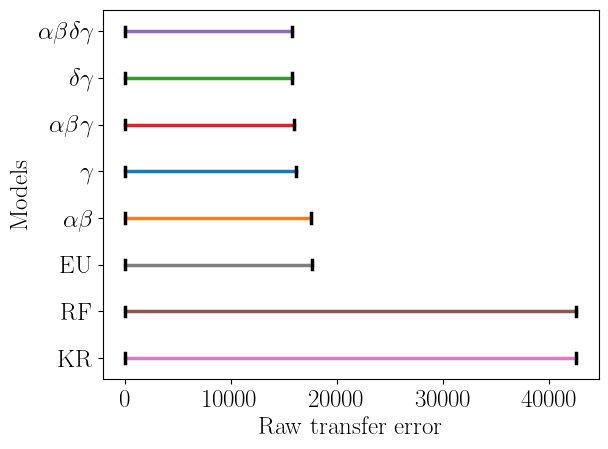

1.026 2.815
1.019 2.877
1.023 2.899
1.036 3.177
1.042 3.185
1.031 3.177
1.841 6.835
1.146 8.224


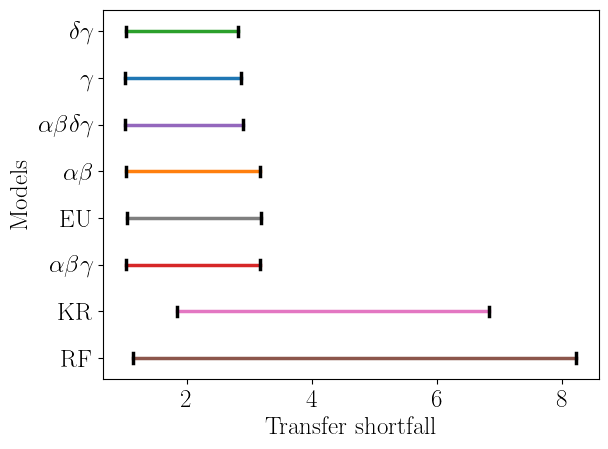

1.001 1.481
1.0 1.71
1.0 2.093
1.005 2.279
1.009 2.46
1.017 2.699
1.841 6.793
1.146 8.224


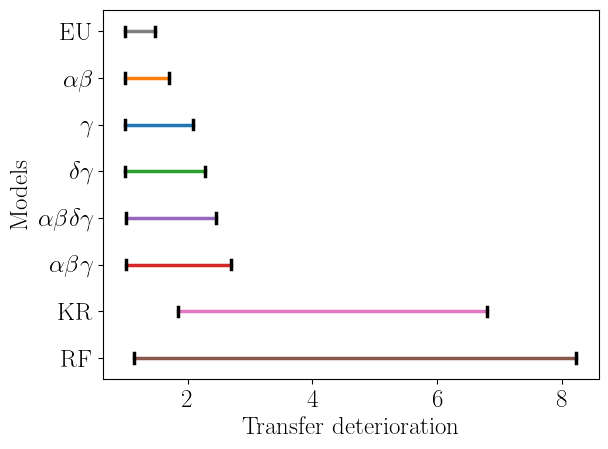

In [23]:
plot_intervals(all_models, raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_transfer_error.pdf')
plot_intervals(all_models, best_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=normalized_transfer, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_normalized_transfer_error.pdf')
plot_intervals(all_models, same_model_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=same_model_transfer, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_transfer_deterioration.pdf')

# plot_intervals(CPT_models, raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_transfer_error.pdf')
# plot_intervals(CPT_models, best_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=normalized_transfer, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_normalized_transfer_error.pdf')
# plot_intervals(CPT_models, same_model_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=same_model_transfer, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_transfer_deterioration.pdf')